# Perform Network Analysis
* Create a covariance matrix
* Find an ideal noise-removing threshold filter with Random Matrix Theory
* Analyze properties of the network

**Questions to answer with alpha and beta diversity analysis:**  
* Does the 3G and 3M look like 1C or 2C  
* How do 1G and 1M compare to 1C  
* How does 2G compare to 3G, 2M compare to 3M  
* How does 1C compare to 2C

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Import Data

In [2]:
# load data
df_counts_rel = pd.read_csv("data/FCF_relative_counts.csv", index_col=0)
df_annotations = pd.read_csv("data/FCF_annotations_corrected.csv", index_col=0)

print("df_counts_rel.shape", df_counts_rel.shape)
print("df_annotations.shape", df_annotations.shape)

df_counts_rel.shape (86, 141)
df_annotations.shape (86, 5)


## Split Samples Into Groups

In [3]:
groups = set(df_annotations["group"])
groups

{'1C', '1G', '1M', '2C', '2G', '2M', '3G', '3M', 'C0C'}

In [4]:
df_counts_rel_1C = df_counts_rel.loc[df_annotations["group"] == "1C", :]
df_counts_rel_1G = df_counts_rel.loc[df_annotations["group"] == "1G", :]
df_counts_rel_1M = df_counts_rel.loc[df_annotations["group"] == "1M", :]
df_counts_rel_2C = df_counts_rel.loc[df_annotations["group"] == "2C", :]
df_counts_rel_2G = df_counts_rel.loc[df_annotations["group"] == "2G", :]
df_counts_rel_2M = df_counts_rel.loc[df_annotations["group"] == "2M", :]
df_counts_rel_3G = df_counts_rel.loc[df_annotations["group"] == "3G", :]
df_counts_rel_3M = df_counts_rel.loc[df_annotations["group"] == "3M", :]

## Network Construction
* create a pair-wise similarity (Pearson) of abundance across different samples
* determine adjacency matrix by RMT-based approach

In [5]:
import network_analysis_thesholding as nat

## Use Random Matrix Theory To Threshold

Good overview of Random Matrix Theory by [Torsten Scholak](https://tscholak.github.io/code/physics/2015/05/05/unfoldr.html)

TODO: figure out if my Poisson distribution is very off... my chi_squared value seems unreal...

In [6]:
# nat.find_RMT_threshold(df_counts_rel_1G, s_tb=0.3, alpha=0.5)

### Data Is Too Messy
Since the data is too messy, this code lets you eyeball the threshold where the data fits the Poisson distribution more than it fits the GOE distribution.

In [7]:
# threshold = 0.03

# nat.visualize_RMT_threshold(df_counts_rel_1C, threshold)
# nat.visualize_RMT_threshold(df_counts_rel_1G, threshold)
# nat.visualize_RMT_threshold(df_counts_rel_1M, threshold)
# nat.visualize_RMT_threshold(df_counts_rel_2C, threshold)
# nat.visualize_RMT_threshold(df_counts_rel_2G, threshold)
# nat.visualize_RMT_threshold(df_counts_rel_2M, threshold)
# nat.visualize_RMT_threshold(df_counts_rel_3G, threshold)
# nat.visualize_RMT_threshold(df_counts_rel_3M, threshold)

shape (111, 111)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


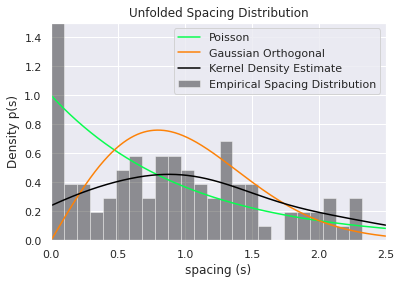

Xsq_poisson 18726612675.950092
Xsq_crit 135.48017792835952 at alpha=0.05
shape (69, 69)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


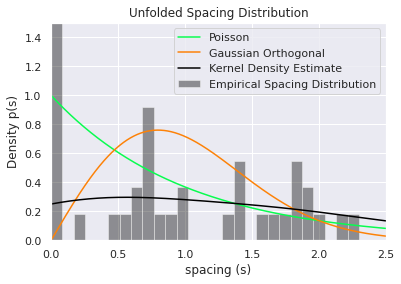

Xsq_poisson 6025519204.914026
Xsq_crit 88.25016442187412 at alpha=0.05
shape (76, 76)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


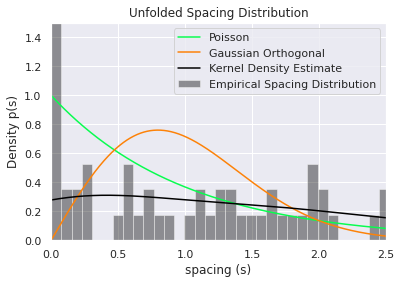

Xsq_poisson 264891700228.84634
Xsq_crit 96.21667075350383 at alpha=0.05
shape (116, 116)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


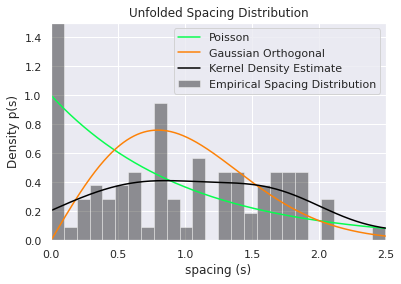

Xsq_poisson 2023873958476.0115
Xsq_crit 141.02970429440973 at alpha=0.05
shape (113, 113)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/empyricalRMT/_validate.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(array, dtype=float)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=or

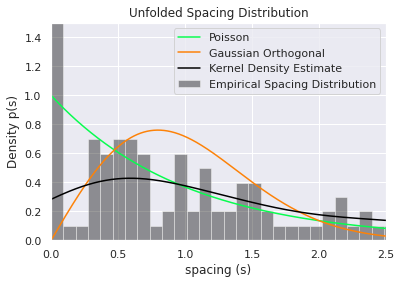

Xsq_poisson (647254498.9626217-5.111074676882285e-10j)
Xsq_crit 137.7014638633707 at alpha=0.05
shape (122, 122)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


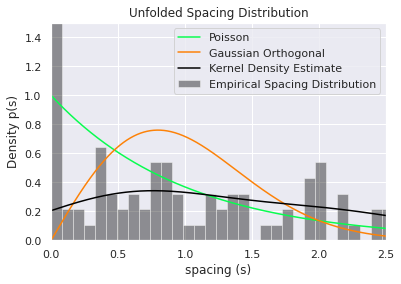

Xsq_poisson 38676237551414.87
Xsq_crit 147.67352976381804 at alpha=0.05
shape (100, 100)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


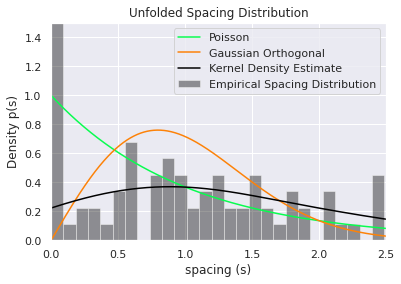

Xsq_poisson 397838623.98974097
Xsq_crit 123.2252214533618 at alpha=0.05
shape (104, 104)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


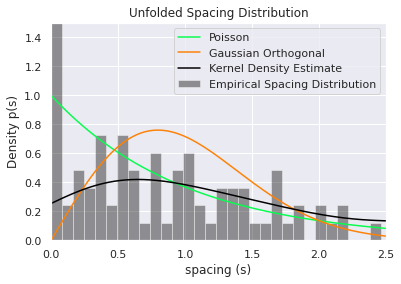

Xsq_poisson 8376307573.361557
Xsq_crit 127.68930826333825 at alpha=0.05


In [8]:
threshold = 0.76

nat.visualize_RMT_threshold(df_counts_rel_1C, threshold)
nat.visualize_RMT_threshold(df_counts_rel_1G, threshold)
nat.visualize_RMT_threshold(df_counts_rel_1M, threshold)
nat.visualize_RMT_threshold(df_counts_rel_2C, threshold)
nat.visualize_RMT_threshold(df_counts_rel_2G, threshold)
nat.visualize_RMT_threshold(df_counts_rel_2M, threshold)
nat.visualize_RMT_threshold(df_counts_rel_3G, threshold)
nat.visualize_RMT_threshold(df_counts_rel_3M, threshold)

In [9]:
threshold = 0.76
df_adjm_1C = nat.get_thresholded_matrix(nat.get_similarity_matrix(df_counts_rel_1C), threshold)
df_adjm_1G = nat.get_thresholded_matrix(nat.get_similarity_matrix(df_counts_rel_1G), threshold)
df_adjm_1M = nat.get_thresholded_matrix(nat.get_similarity_matrix(df_counts_rel_1M), threshold)
df_adjm_2C = nat.get_thresholded_matrix(nat.get_similarity_matrix(df_counts_rel_2C), threshold)
df_adjm_2G = nat.get_thresholded_matrix(nat.get_similarity_matrix(df_counts_rel_2G), threshold)
df_adjm_2M = nat.get_thresholded_matrix(nat.get_similarity_matrix(df_counts_rel_2M), threshold)
df_adjm_3G = nat.get_thresholded_matrix(nat.get_similarity_matrix(df_counts_rel_3G), threshold)
df_adjm_3M = nat.get_thresholded_matrix(nat.get_similarity_matrix(df_counts_rel_3M), threshold)

shape (111, 111)
shape (69, 69)
shape (76, 76)
shape (116, 116)
shape (113, 113)
shape (122, 122)
shape (100, 100)
shape (104, 104)


In [10]:
# # save adjacency matrices
# df_adjm_1C.to_csv(f"data/adjm/df_adjm_1C_{round(threshold*100)}.csv")
# df_adjm_1G.to_csv(f"data/adjm/df_adjm_1G_{round(threshold*100)}.csv")
# df_adjm_1M.to_csv(f"data/adjm/df_adjm_1M_{round(threshold*100)}.csv")
# df_adjm_2C.to_csv(f"data/adjm/df_adjm_2C_{round(threshold*100)}.csv")
# df_adjm_2G.to_csv(f"data/adjm/df_adjm_2G_{round(threshold*100)}.csv")
# df_adjm_2M.to_csv(f"data/adjm/df_adjm_2M_{round(threshold*100)}.csv")
# df_adjm_3G.to_csv(f"data/adjm/df_adjm_3G_{round(threshold*100)}.csv")
# df_adjm_3M.to_csv(f"data/adjm/df_adjm_3M_{round(threshold*100)}.csv")

In [11]:
df_adjm_3M

,opitutus spp.,paludibacter propionicigenes,magnetospirillum sp.,rhodopseudomonas palustris,acetobacter spp.,bacteroides spp.,pleomorphomonas oryzae,afipia sp.,rhodoblastus acidophilus,spirochaeta spp.,...,oribacterium sinus,flexithrix dorotheae,methylococcus capsulatus,methylopila sp.,enhydrobacter aerosaccus,burkholderia ubonensis,aeromonas spp.,methylocystis sp.,sphingomonas faeni,lactobacillus helveticus
opitutus spp.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
paludibacter propionicigenes,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
magnetospirillum sp.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rhodopseudomonas palustris,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
acetobacter spp.,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
burkholderia ubonensis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aeromonas spp.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
methylocystis sp.,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
sphingomonas faeni,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Analyze Network Properties:

**Key Characteristics:**
* k-core, average path length, local clustering coefficient
* the average degree, degree distribution
* module, clique, motif

**Density:** tells you how connected a network is. A 0 density would mean that there are no connections at all, and a 1 would indicate that all possible edges are present (a perfectly connected network).

**Transitivity:** like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections. A triangle is formed if two nodes that are connected to a node are also connected to each other.

There are many network metrics derived from shortest path lengths. One such measure is **diameter**, which is the longest of all shortest paths. After calculating all shortest paths between every possible pair of nodes in the network, diameter is the length of the path between the two nodes that are furthest apart. The measure is designed to give you a sense of the network’s overall size, the distance from one end of the network to another.

After getting some basic measures of the entire network structure, a good next step is to find which nodes are the most important ones in your network. In network analysis, measures of the importance of nodes are referred to as centrality measures. Because there are many ways of approaching the question “Which nodes are the most important?” there are many different ways of calculating centrality. Here you’ll learn about three of the most common centrality measures: degree, betweenness centrality, and eigenvector centrality.

**Features of Nodes:**
* degree, degree centrality
* node-betweenness, node-betweenness centrality
* closeness, cluster coefficient, coreness
* eigenvector centrality

**Degree Distribution:** Most networks will have just a few hubs of very high degree, with the rest of similar, much lower degree

**Eigenvector centrality:** is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. If you know a lot of well-connected people, you could spread a message very efficiently. If you’ve used Google, then you’re already somewhat familiar with Eigenvector centrality. Their PageRank algorithm uses an extension of this formula to decide which webpages get to the top of its search results.

**Betweenness centrality:** is a bit different from the other two measures in that it doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). To do this, it must first calculate every possible shortest path in your network, so keep in mind that betweenness centrality will take longer to calculate than other centrality measures (but it won’t be an issue in a dataset of this size). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network. If you’re the only thing connecting two clusters, every communication between those clusters has to pass through you. In contrast to a hub, this sort of node is often referred to as a broker. Betweenness centrality is not the only way of finding brokerage (and other methods are more systematic), but it’s a quick way of giving you a sense of which nodes are important not because they have lots of connections themselves but because they stand between groups, giving the network connectivity and cohesion.

Read More Here: [Social Network Analysis: From Graph Theory to Applications with Python](https://towardsdatascience.com/social-network-analysis-from-theory-to-applications-with-python-d12e9a34c2c7)


**Special Nodes:**
* modular hub node
* connector node
* peripheral node

**Features of Edges:**
* shortest path, distance
* edge-betweenness

---

Sources:
* https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

In [12]:
import network_analysis_properties as nap
import networkx as nx 

In [13]:
G_1C = nap.get_network_from_adjm(df_adjm_1C, name="1C")
G_1G = nap.get_network_from_adjm(df_adjm_1G, name="1G")
G_1M = nap.get_network_from_adjm(df_adjm_1M, name="1M")
G_2C = nap.get_network_from_adjm(df_adjm_2C, name="2C")
G_2G = nap.get_network_from_adjm(df_adjm_2G, name="2G")
G_2M = nap.get_network_from_adjm(df_adjm_2M, name="2M")
G_3G = nap.get_network_from_adjm(df_adjm_3G, name="3G")
G_3M = nap.get_network_from_adjm(df_adjm_3M, name="3M")

In [14]:
# # save networks to csv
# nap.network_to_csv(G_1C, f"data/network/df_network_1C_{round(threshold*100)}.csv")
# nap.network_to_csv(G_1G, f"data/network/df_network_1G_{round(threshold*100)}.csv")
# nap.network_to_csv(G_1M, f"data/network/df_network_1M_{round(threshold*100)}.csv")
# nap.network_to_csv(G_2C, f"data/network/df_network_2C_{round(threshold*100)}.csv")
# nap.network_to_csv(G_2G, f"data/network/df_network_2G_{round(threshold*100)}.csv")
# nap.network_to_csv(G_2M, f"data/network/df_network_2M_{round(threshold*100)}.csv")
# nap.network_to_csv(G_3G, f"data/network/df_network_3G_{round(threshold*100)}.csv")
# nap.network_to_csv(G_3M, f"data/network/df_network_3M_{round(threshold*100)}.csv")

saving to data/network/df_network_1C_76.csv
saving to data/network/df_network_1G_76.csv
saving to data/network/df_network_1M_76.csv
saving to data/network/df_network_2C_76.csv
saving to data/network/df_network_2G_76.csv
saving to data/network/df_network_2M_76.csv
saving to data/network/df_network_3G_76.csv
saving to data/network/df_network_3M_76.csv


In [15]:
print(nap.get_network_attribute_summary(G_1C), "\n")
print(nap.get_network_attribute_summary(G_1G), "\n")
print(nap.get_network_attribute_summary(G_1M), "\n")
print(nap.get_network_attribute_summary(G_2C), "\n")
print(nap.get_network_attribute_summary(G_2G), "\n")
print(nap.get_network_attribute_summary(G_2M), "\n")
print(nap.get_network_attribute_summary(G_3G), "\n")
print(nap.get_network_attribute_summary(G_3M), "\n")

Name: 1C
Type: Graph
Number of nodes: 111
Number of edges: 408
Average degree:   7.3514
Network density: 0.06683046683046683
Triadic closure: 0.6150151668351871
Network is connected: False
Network diameter of largest component: 11
None 

Name: 1G
Type: Graph
Number of nodes: 69
Number of edges: 211
Average degree:   6.1159
Network density: 0.08994032395566923
Triadic closure: 0.6837782340862423
Network is connected: False
Network diameter of largest component: 6
None 

Name: 1M
Type: Graph
Number of nodes: 76
Number of edges: 193
Average degree:   5.0789
Network density: 0.06771929824561404
Triadic closure: 0.7577197149643705
Network is connected: False
Network diameter of largest component: 12
None 

Name: 2C
Type: Graph
Number of nodes: 116
Number of edges: 809
Average degree:  13.9483
Network density: 0.12128935532233882
Triadic closure: 0.6569392348087022
Network is connected: True
Network diameter of largest component: 7
None 

Name: 2G
Type: Graph
Number of nodes: 113
Number of e

## Key Characteristics

### Features of Nodes




In [17]:
set([k for n in G_1C.nodes for k in G_1C.nodes[n].keys()])

{'among_module_connectivity',
 'betweenness',
 'degree',
 'eigenvector_centrality',
 'modularity',
 'within_module_connectivity',
 'within_module_degree'}

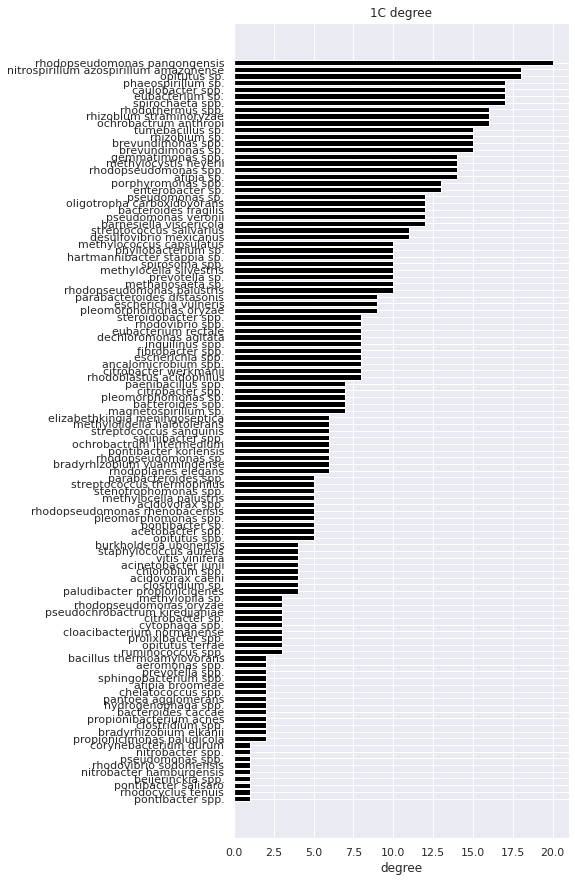

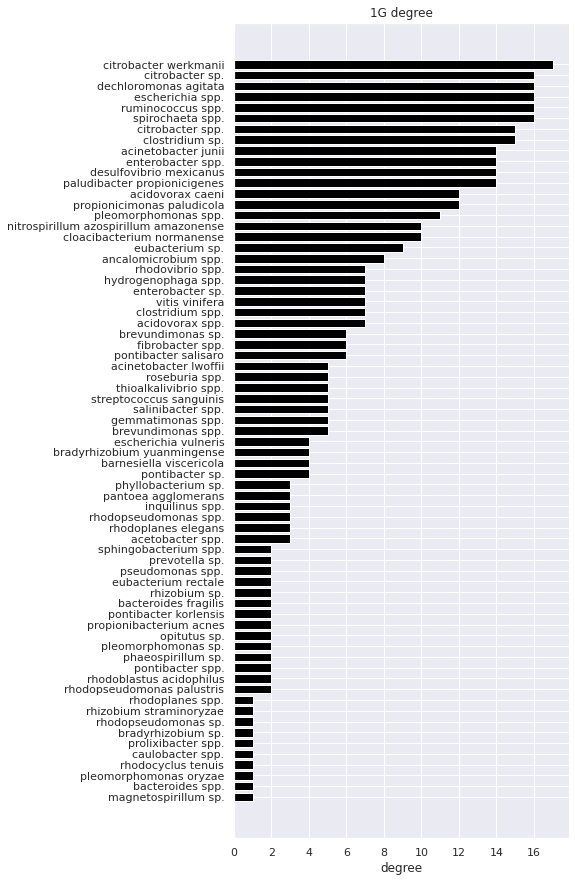

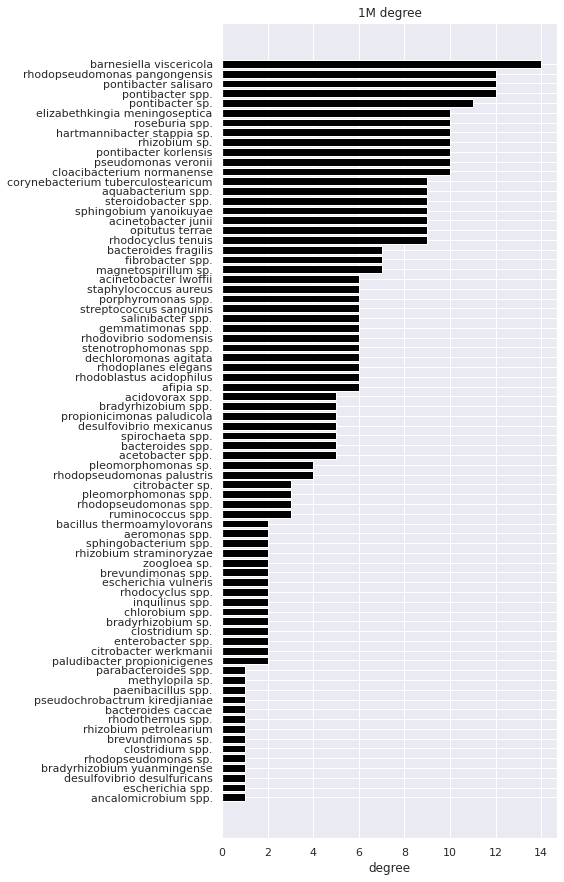

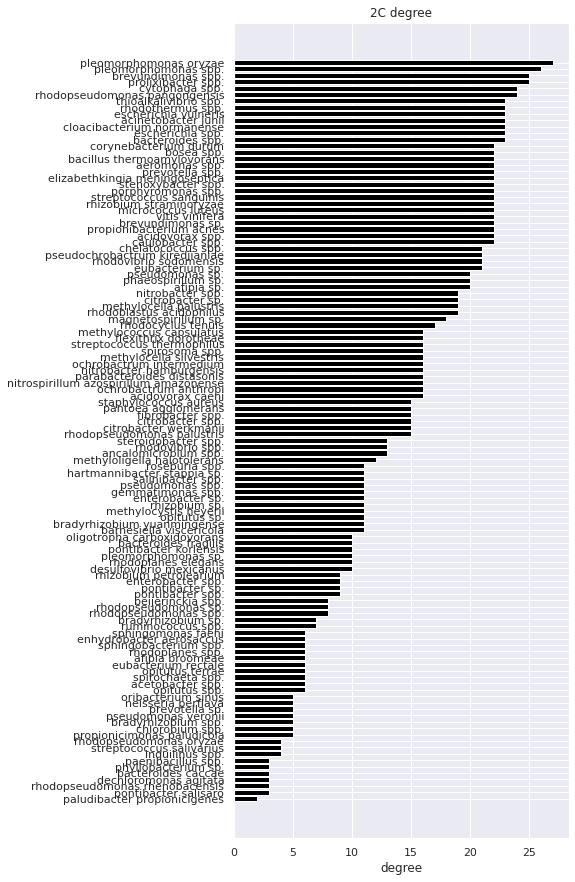

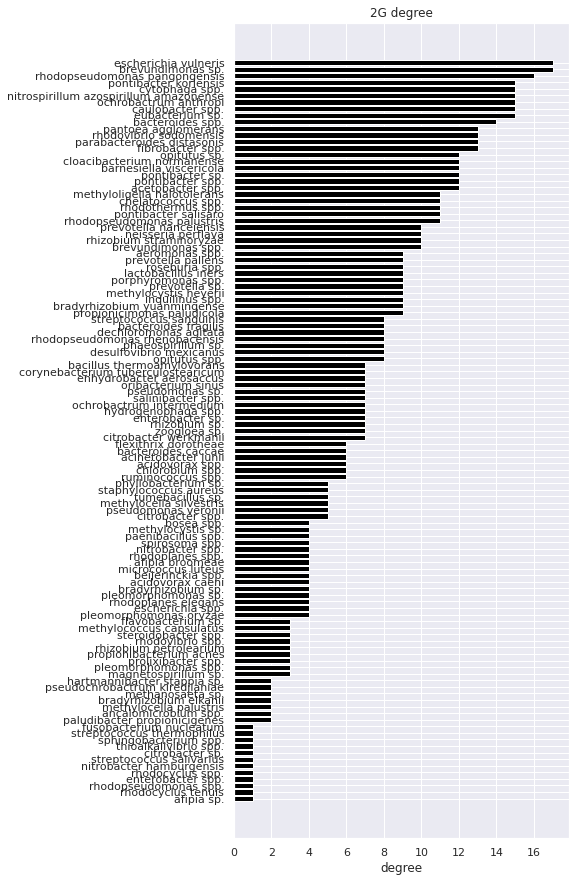

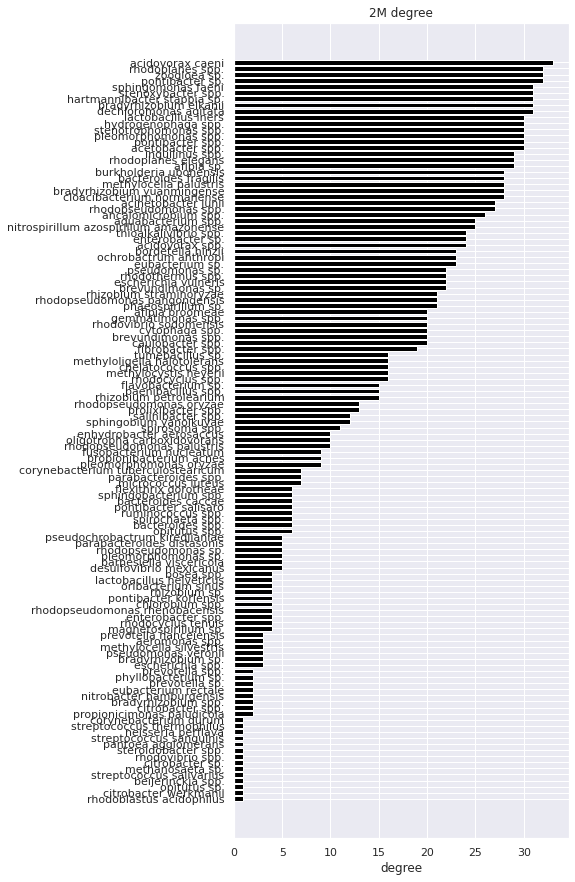

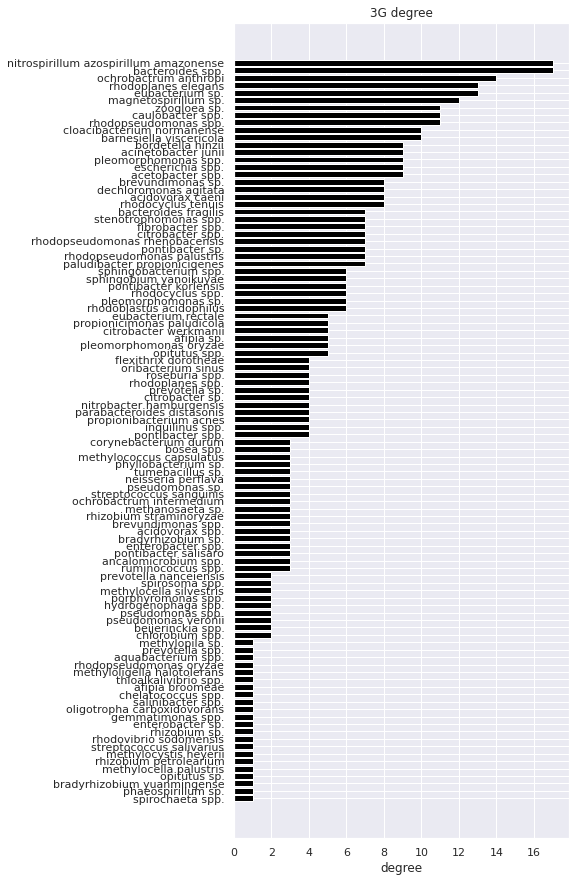

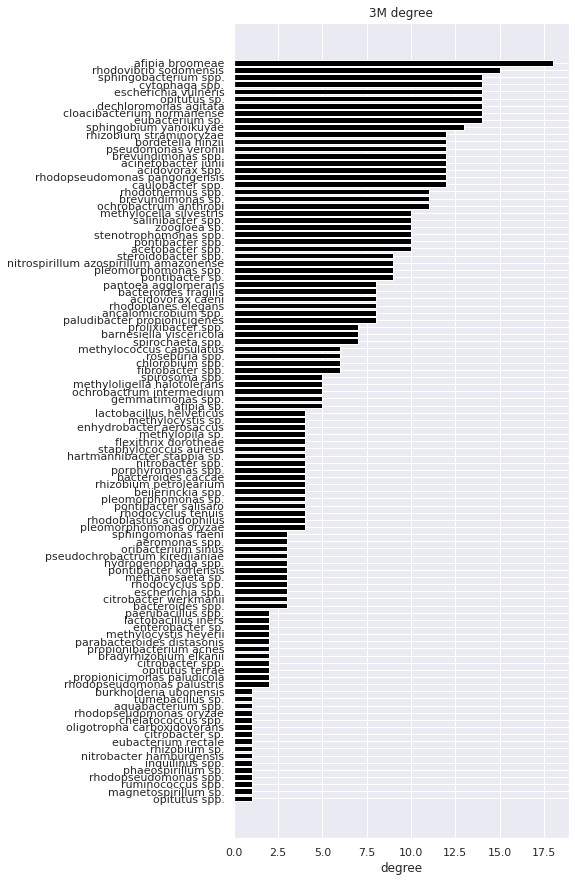

In [18]:
attribute = "degree"
nap.display_sorted_property(G_1C, attribute=attribute)
nap.display_sorted_property(G_1G, attribute=attribute)
nap.display_sorted_property(G_1M, attribute=attribute)
nap.display_sorted_property(G_2C, attribute=attribute)
nap.display_sorted_property(G_2G, attribute=attribute)
nap.display_sorted_property(G_2M, attribute=attribute)
nap.display_sorted_property(G_3G, attribute=attribute)
nap.display_sorted_property(G_3M, attribute=attribute)

## Advanced NetworkX: Community detection with modularity

There are many ways of calculating communities, cliques, and clusters in your network, but the most popular method currently is modularity. Modularity is a measure of relative density in your network: a community (called a module or modularity class) has high density relative to other nodes within its module but low density with those outside. Modularity gives you an overall score of how fractious your network is, and that score can be used to partition the network and return the individual communities.

In [19]:
from networkx.algorithms import community # This part of networkx, for community detection, needs to be imported separately.

In [20]:
# print out list of communities for each group
print("G_1C", len(community.greedy_modularity_communities(G_1C)), "\n")
print("G_1G", len(community.greedy_modularity_communities(G_1G)), "\n")
print("G_1M", len(community.greedy_modularity_communities(G_1M)), "\n")
print("G_2C", len(community.greedy_modularity_communities(G_2C)), "\n")
print("G_2G", len(community.greedy_modularity_communities(G_2G)), "\n")
print("G_2M", len(community.greedy_modularity_communities(G_2M)), "\n")
print("G_3G", len(community.greedy_modularity_communities(G_3G)), "\n")
print("G_3M", len(community.greedy_modularity_communities(G_3M)), "\n")

G_1C 7 

G_1G 10 

G_1M 10 

G_2C 5 

G_2G 7 

G_2M 13 

G_3G 14 

G_3M 11 



### Visualize Network

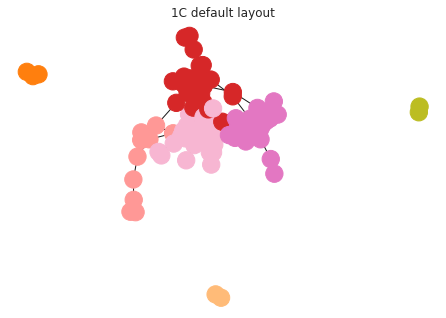

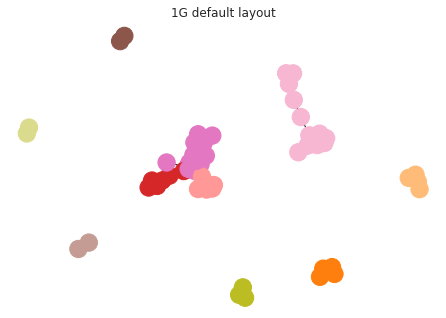

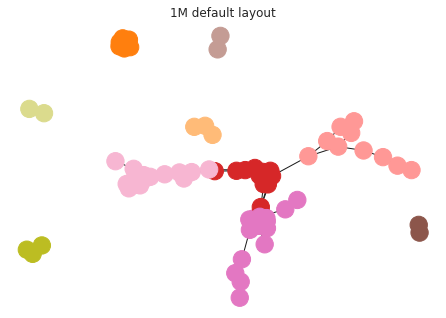

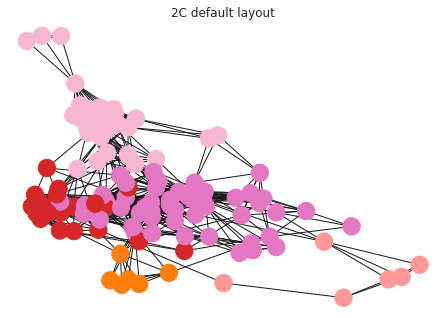

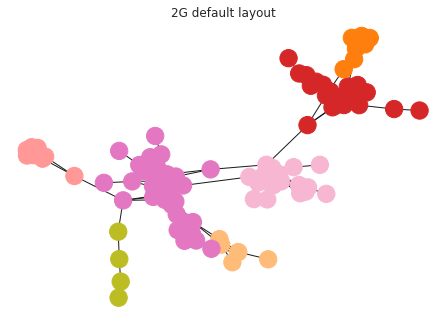

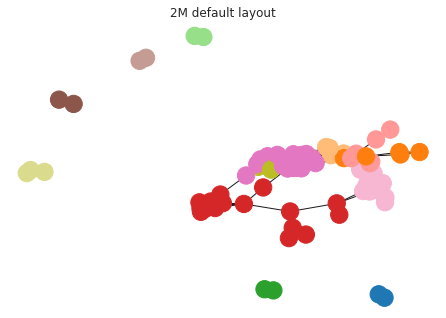

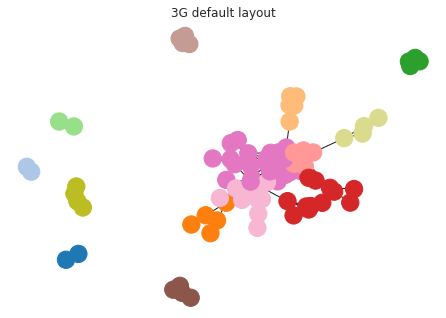

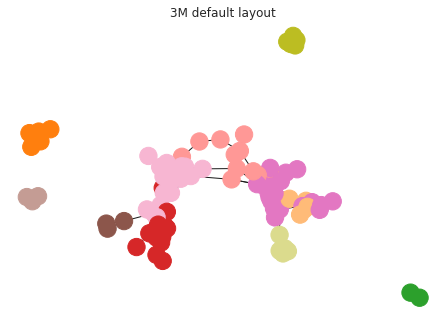

In [21]:
nap.visualize_network(G_1C)
nap.visualize_network(G_1G)
nap.visualize_network(G_1M)
nap.visualize_network(G_2C)
nap.visualize_network(G_2G)
nap.visualize_network(G_2M)
nap.visualize_network(G_3G)
nap.visualize_network(G_3M)

## Try Circular Layout

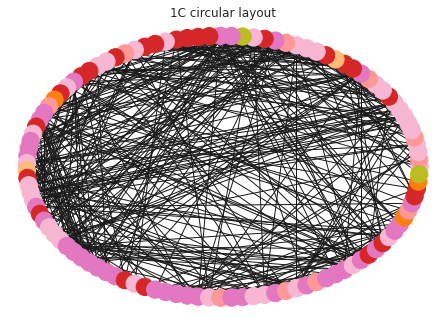

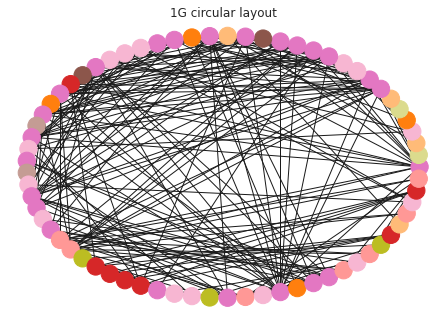

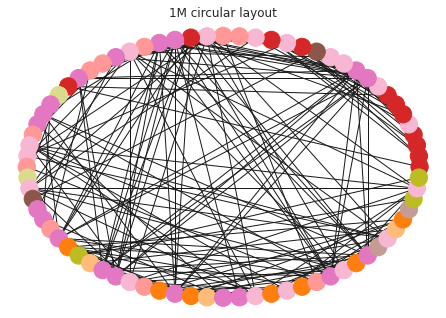

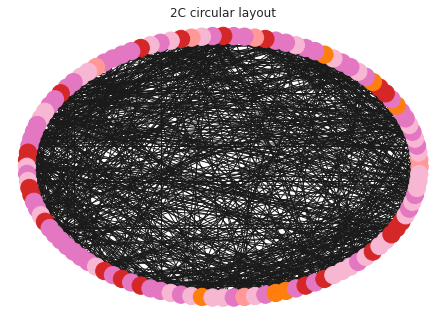

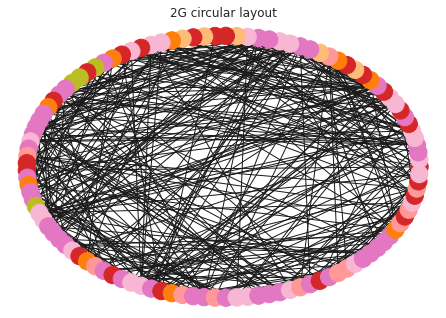

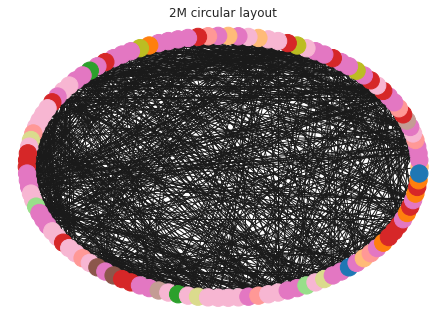

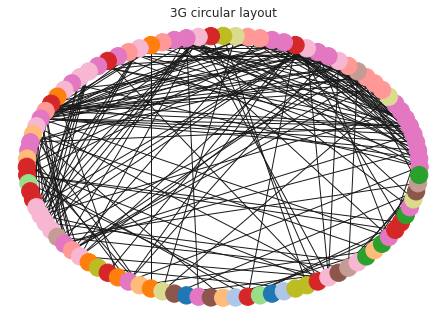

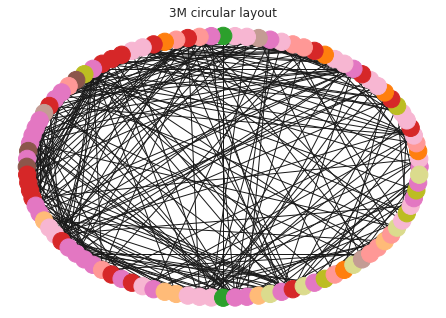

In [25]:
nap.visualize_network(G_1C, layout="circular")
nap.visualize_network(G_1G, layout="circular")
nap.visualize_network(G_1M, layout="circular")
nap.visualize_network(G_2C, layout="circular")
nap.visualize_network(G_2G, layout="circular")
nap.visualize_network(G_2M, layout="circular")
nap.visualize_network(G_3G, layout="circular")
nap.visualize_network(G_3M, layout="circular")

In [22]:
# # First get a list of just the nodes in that class
# class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]
# # Then create a dictionary of the eigenvector centralities of those nodes
# class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}
# # Then sort that dictionary and print the results
# class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)
# print("Modularity Class 0 Sorted by Eigenvector Centrality:")
# for node in class0_sorted_by_eigenvector:
#     print("Name:", node[0], "| Eigenvector Centrality:", node[1])

## Indentification of Key Module Members

After all modules are separated, each node can be
assigned a role based on its topological properties and the role of node i is characterized by its within-module connectivity (zi) and among-module connectivity (Pi)

If all links of node i only belong to its own module, Pi = 0.  
If the links of node i are distributed evenly among modules, Pi --> 1.

Peripheral nodes:     zi <= 2.5, Pi <= 0.62  
Connector nodes:      zi <= 2.5, Pi > 0.62  
Module hub nodes:     zi > 2.5,  Pi <= 0.62  
Network hub nodes:    zi > 2.5,  Pi > 0.62  

---

Sources:
* https://www.researchgate.net/post/How_should_I_interpret_the_connectivity_measures_kTotal_kWithin_kOut_kDiff_in_WGCNA
* MENAP paper

In [23]:
node_roles_1C = nap.get_node_roles(G_1C, verbose=True)
node_roles_1G = nap.get_node_roles(G_1G, verbose=True)
node_roles_1M = nap.get_node_roles(G_1M, verbose=True)
node_roles_2C = nap.get_node_roles(G_2C, verbose=True)
node_roles_2G = nap.get_node_roles(G_2G, verbose=True)
node_roles_2M = nap.get_node_roles(G_2M, verbose=True)
node_roles_3G = nap.get_node_roles(G_3G, verbose=True)
node_roles_3M = nap.get_node_roles(G_2M, verbose=True)

---
# peripheral nodes: 35
# connector nodes: 75
# module hub nodes: 0
# network hub nodes: 1
total number of nodes: 111
---
# peripheral nodes: 25
# connector nodes: 44
# module hub nodes: 0
# network hub nodes: 0
total number of nodes: 69
---
# peripheral nodes: 20
# connector nodes: 56
# module hub nodes: 0
# network hub nodes: 0
total number of nodes: 76
---
# peripheral nodes: 46
# connector nodes: 70
# module hub nodes: 0
# network hub nodes: 0
total number of nodes: 116
---
# peripheral nodes: 38
# connector nodes: 75
# module hub nodes: 0
# network hub nodes: 0
total number of nodes: 113
---
# peripheral nodes: 42
# connector nodes: 80
# module hub nodes: 0
# network hub nodes: 0
total number of nodes: 122
---
# peripheral nodes: 21
# connector nodes: 79
# module hub nodes: 0
# network hub nodes: 0
total number of nodes: 100
---
# peripheral nodes: 42
# connector nodes: 80
# module hub nodes: 0
# network hub nodes: 0
total number of nodes: 122


In [24]:
node_roles_3M

{'peripheral_nodes': [('magnetospirillum sp.', -1.9113058851522091, 0.0),
  ('rhodopseudomonas palustris', -1.4006516410275731, 0.18999999999999995),
  ('acetobacter spp.', 0.6419653354709709, 0.06555555555555559),
  ('afipia sp.', 0.6419653354709709, 0.0),
  ('pontibacter spp.', 0.7440961842958981, 0.0),
  ('pontibacter sp.', 0.9483578819457524, 0.0),
  ('ancalomicrobium spp.', 0.23344194017126207, 0.07544378698224852),
  ('escherichia spp.', -2.1155675828020635, 0.5555555555555556),
  ('rhodoplanes elegans', 0.6419653354709709, 0.0),
  ('rhodopseudomonas spp.', 0.13131109134633487, 0.2098765432098766),
  ('pleomorphomonas spp.', 0.7440961842958981, 0.0),
  ('cloacibacterium normanense', 0.5398344866460436, 0.0),
  ('pleomorphomonas sp.', -1.9113058851522091, 0.3599999999999999),
  ('acidovorax caeni', 1.0504887307706796, 0.0),
  ('fibrobacter spp.', -0.48147400160322834, 0.1024930747922439),
  ('chlorobium spp.', -1.9113058851522091, 0.0),
  ('bradyrhizobium yuanmingense', 0.53983448